# Stereo

Given two images from sligthly different viewpoints we are able to infer depth.

The problem is simplified by placing a virtual image plane in front of the focal center that is the optical center of each camera lens, $O_L$ and $O_R$

We now have two camera centers and two image planes.

**Projective line** is a line going through the pixel P on the image on which its projection lies. We search on this line to find correspondences.

$p_L$ and $p_R$ are the projections of $P$ on the image planes.

**Epipolar Constraint** is that if the points $p_L$ and $p_R$ are known, their projection lines are also known. If the two image points correspond to the same 3D point $P$ the projection lines must intersect precisely at $P$.

**Parallel Callibrated Cameras**

Two image planes lie on the same plane, that is at a distance $f$ from center.

$O_R$ is just a translation of $O_L$ by some distance $T$.

Points $O_L$, $O_R$, $p_L$, $p_R$ and $P$ lie on the same plane and the lines $O_LO_R$ and $p_Lp_R$ are prallel.

**Inference**: For a particular pixel in the left image its corresponding pixel lies in the same row of the right image.


***Excercise!***

*How to estimate depth using the geometry seen in the discussed setup?*

Since lines $O_LO_R$ and $p_Lp_R$ are parallel we can use similar traingles.

$x_L$ and $x_R$ are the distances of $p_L$ and $p_R$ from the parallel lines through the camera centers. Here the camera centers are considered as origins and hence $x_L$ is positive and $x_R$ is negative.

$$
\frac{T}{Z} = \frac{T + x_R - 
x_L}{Z - f}
$$

$$
Z = \frac{f \cdot T}{x_R - 
x_L}
$$

*How do $f$ and $T$ affect the depth?*

When $f$ or $T$ decrese the range of depth perception decreses and vice verse dues to direct proportionality.

Depth is however inversely proportional to the disparity. That is, when $x_L$ and $x_R$ are close the point is at $\infty$

And if disparity is more then the depth is closer to the image planes.



### Disparity

The denominator term $x_R - x_L$ is called disparity.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# Import basic functions
import numpy as np 
import cv2
import glob
import os 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
!ls 'drive/My Drive/Images/'

***Excercise!***

Get the disparity map between two objects and remove the objects with a disparity less than a threshold say 120.

Text(0.5, 1.0, 'Truncating Right Image')

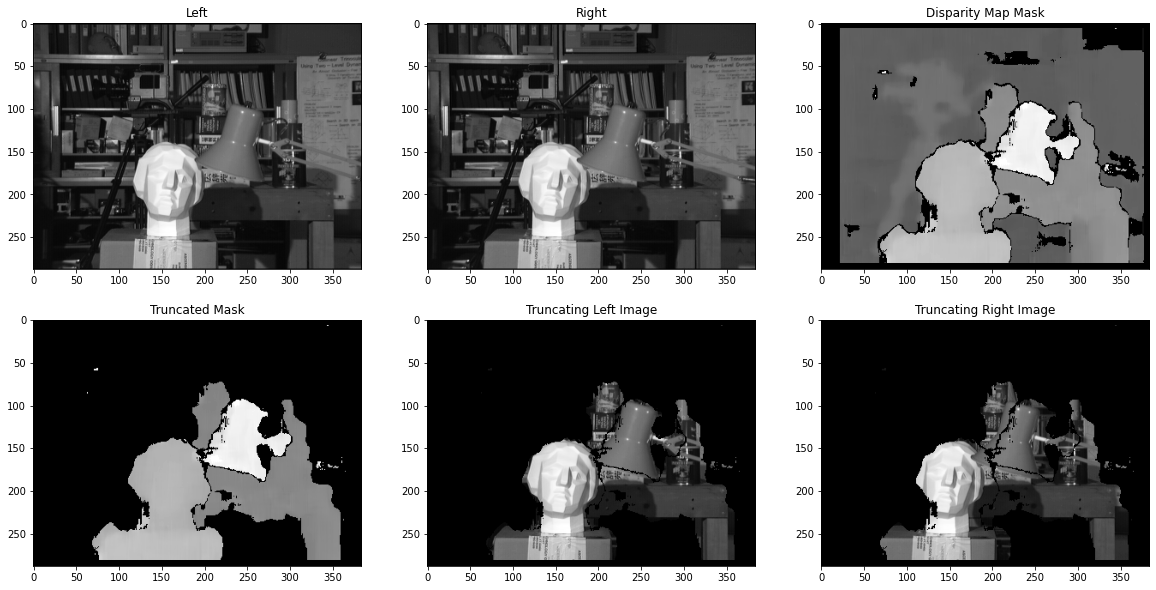

In [27]:
left = cv2.imread("drive/My Drive/Images/tsukuba_l.png", cv2.IMREAD_GRAYSCALE)
right = cv2.imread("drive/My Drive/Images/tsukuba_r.png", cv2.IMREAD_GRAYSCALE)
threshold = 120
originalLeft = left.copy()
originalRight = right.copy()

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15) 
disparity = stereo.compute(left,right)

truncatedmask = disparity.copy()
truncatedmask[truncatedmask < threshold] = 0
originalLeft[disparity < threshold] = 0 
originalRight[disparity < threshold] = 0 


fig = plt.figure(figsize = (20,10))

plt.subplot(231)
plt.imshow(left, 'gray')
plt.title("Left")
plt.subplot(232)
plt.imshow(right, 'gray')
plt.title("Right")
plt.subplot(233)
plt.imshow(disparity, 'gray')
plt.title("Disparity Map Mask")
plt.subplot(234)
plt.imshow(truncatedmask,'gray')
plt.title("Truncated Mask")
plt.subplot(235)
plt.imshow(originalLeft,'gray')
plt.title("Truncating Left Image")
plt.subplot(236)
plt.imshow(originalRight,'gray')
plt.title("Truncating Right Image")


*For each $p_L$ how do we get the corresponding $p_R$?*

We can search on the same horizontal in the right image. But there can be multiple pixels with the same intensity values. This will lead to mis-matches.

Hence, a window around the pixel is considered. An this window is moved along the horizontal line.

SIFT, ORB and others only give sparse correspondance. Not sure what this means.

*Why is $x_R$ to the left of $x_L$?*

Rays are converging and only then correspondance can be found.

**>** I don't understand this. Read it once.

### 3D Recontrustion Using An Image

Viewed on Mesh Lab!

In [0]:
# Code not explained in class, but write and try once.

### Patch Matching 

Finding the correct corresponding patch. Done by taking difference of pixel values, this difference is minimized.

The horizontal line on which we are secrhing for patches is called the **scanline** 

At each point on the scanline compute the **matching cost** 

### SSD
$$
SSD(patch_l, patch_r) = \sum_x \sum_y(I_{patch_l}(x, y) - I_{patch_r}(x,y))^2
$$

SSD must be minimized.

### Normalized Correlation

$$
NC(patch_l, patch_r) = \frac{\sum_x \sum_y(I_{patch_l}(x, y) \cdot I_{patch_r}(x,y))}{||I_{patch_l}(x, y)|| - || I_{patch_r}(x,y)||}
$$

NC must be maximized.

***Excercise!***

Take two views and perform SSD based patch matching to get the disparity map.


In [0]:
# Finish this!